In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np

In [15]:
%matplotlib notebook

In [2]:
df_can = pd.read_excel('Dataset/Canada.xlsx', sheet_name='Canada by Citizenship',
                       skiprows=range(20), skip_footer=2)

/home/praneet/venv/deep_learning/lib/python3.5/site-packages/pandas/util/_decorators.py:188: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  return func(*args, **kwargs)


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Let's clean the data set to remove a few unnecessary columns.

In [4]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


Let's rename the columns so that they make sense.

In [5]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

We will also add a 'Total' column that sums up the total immigrants by country over the entire period 1980 - 2013, as follows:

In [6]:
df_can['Total'] = df_can.sum(axis=1)

The defaul index of the dataset is a numeric range from 0 to 194. This makes it very difficult to do a query by a specific country. For example to search for data on Japan, we need to know the corressponding index value.

This can be fixed very easily by setting the 'Country' column as the index using set_index() method.

In [7]:
df_can.set_index('Country', inplace=True)
# tip: The opposite of set is reset. So to reset the index, we can use df_can.reset_index()

In [8]:
df_can.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


Column names that are integers (such as the years) might introduce some confusion. For example, when we are referencing the year 2013, one might confuse that when the 2013th positional index.

To avoid this ambuigity, let's convert the column names into strings: '1980' to '2013'.

In [9]:
df_can.columns = list(map(str, df_can.columns))

Since we converted the years to string, let's declare a variable that will allow us to easily call upon the full range of years:

In [10]:
# useful for plotting later on
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

# Pie Chart

In [11]:
df_continents = df_can.groupby('Continent', axis=0).sum()

In [12]:
df_continents.head(3)

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947


In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

<IPython.core.display.Javascript object>


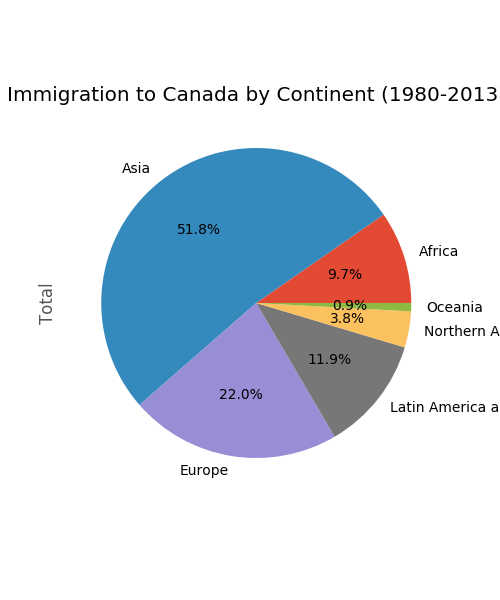

In [16]:
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%',) # add in percentages

plt.title('Immigration to Canada by Continent (1980-2013)')
plt.show()

<IPython.core.display.Javascript object>


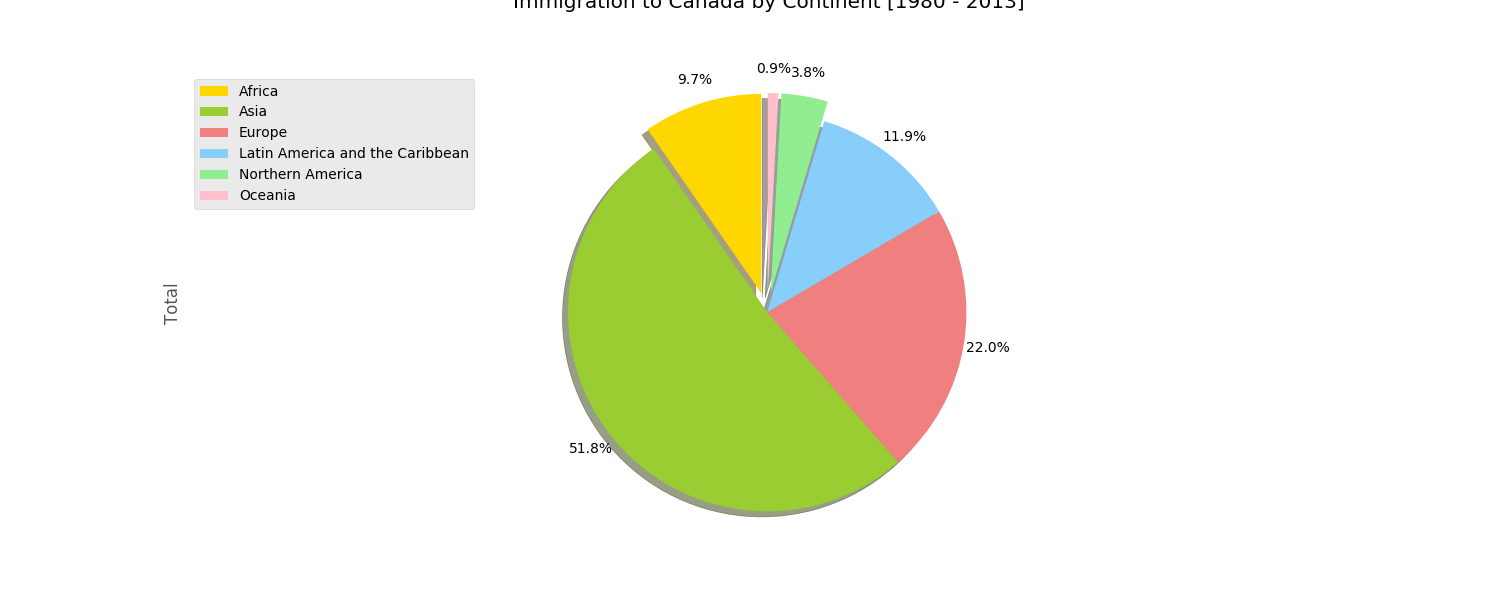

In [17]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

# Box Plot

<IPython.core.display.Javascript object>


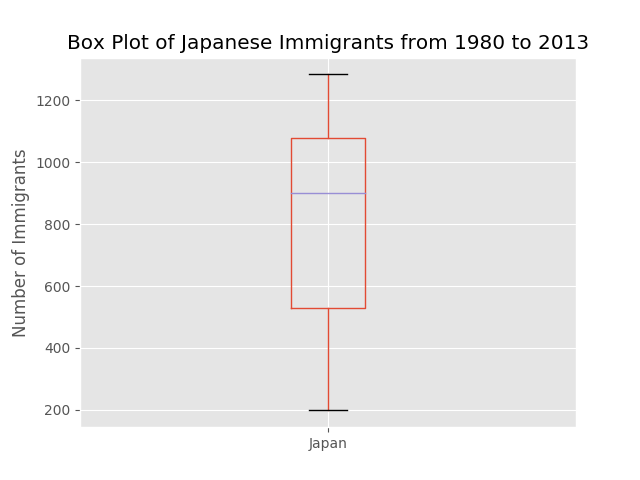

In [18]:
df_japan = df_can.loc[['Japan'], years].transpose()

df_japan.plot(kind='box')
plt.title('Box Plot of Japanese Immigrants from 1980 to 2013')
plt.ylabel('Number of Immigrants')

plt.show()

<IPython.core.display.Javascript object>


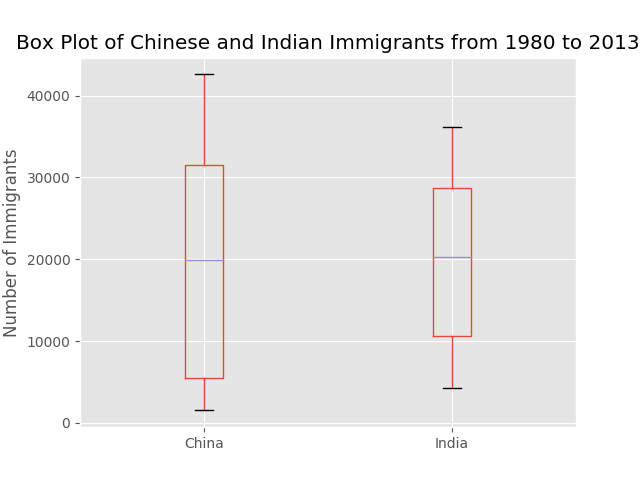

In [19]:
df_CI = df_can.loc[['China', 'India'], years].transpose()

df_CI.plot(kind='box')
plt.title('Box Plot of Chinese and Indian Immigrants from 1980 to 2013')
plt.ylabel('Number of Immigrants')

plt.show()

<IPython.core.display.Javascript object>


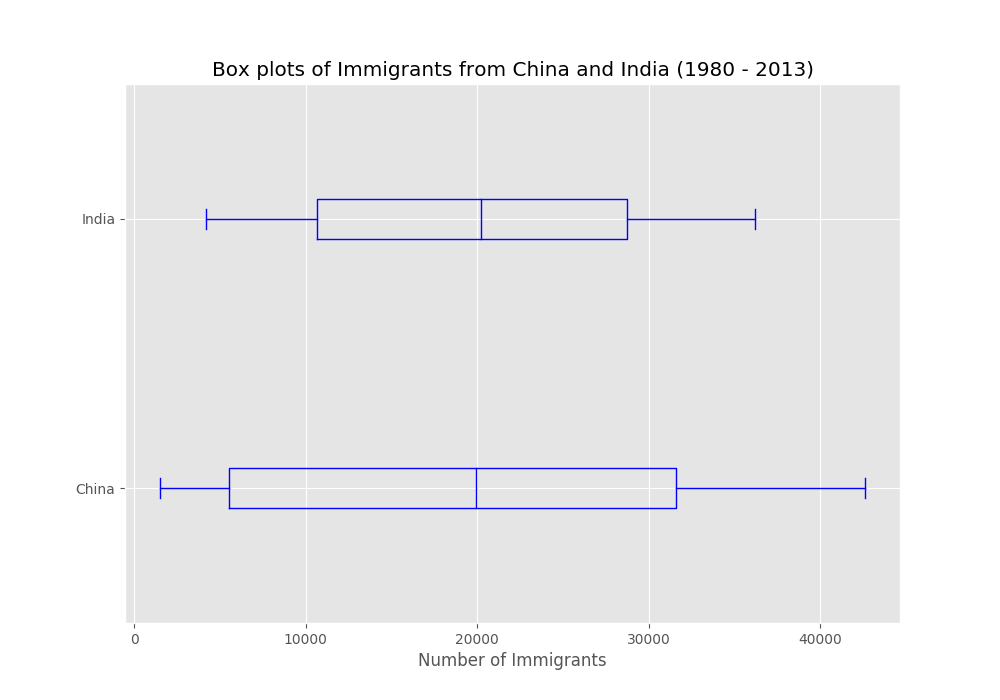

In [20]:
# horizontal box plots
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

<IPython.core.display.Javascript object>


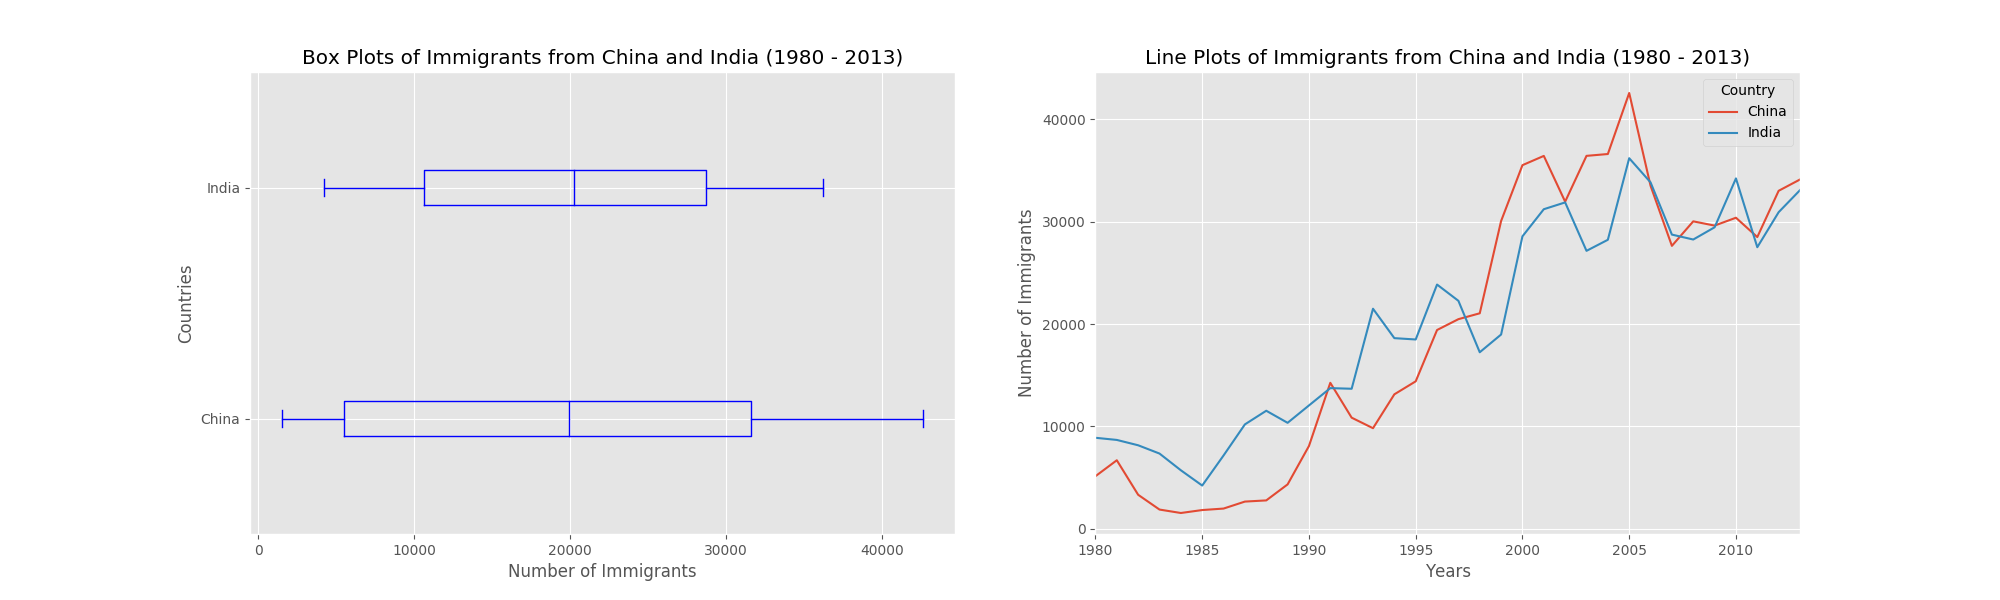

In [21]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

# Scatter Plot

Using a `scatter plot`, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

In [22]:
# we can use the sum() method to get the total population per year
df_total = pd.DataFrame(df_can[years].sum(axis=0))

In [25]:
# change the years to type int (useful for regression later on)
df_total.index = map(int, df_total.index)

In [27]:
# reset the index to put in back in as a column in the df_tot dataframe
df_total.reset_index(inplace = True)

In [30]:
# rename columns
df_total.columns = ['year', 'total']

In [32]:
df_total.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


<IPython.core.display.Javascript object>


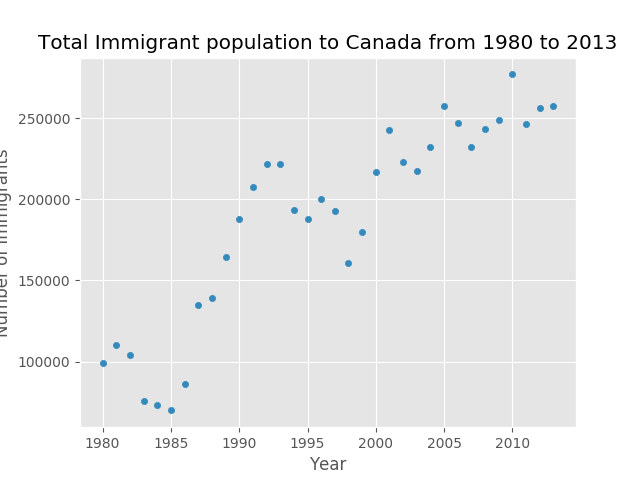

In [36]:
df_total.plot(kind='scatter',
              x='year',
              y='total')

plt.title('Total Immigrant population to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

# Bubble Plot

In [43]:
df_T = df_can[years].transpose()

df_T.index = map(int, df_T.index)

df_T.index.name = 'Year'

df_T.reset_index(inplace=True)

In [44]:
df_T.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [45]:
# normalize Brazil data
norm_brazil = (df_T['Brazil'] - df_T['Brazil'].min()) / (df_T['Brazil'].max() - df_T['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_T['Argentina'] - df_T['Argentina'].min()) / (df_T['Argentina'].max() - df_T['Argentina'].min())

<IPython.core.display.Javascript object>


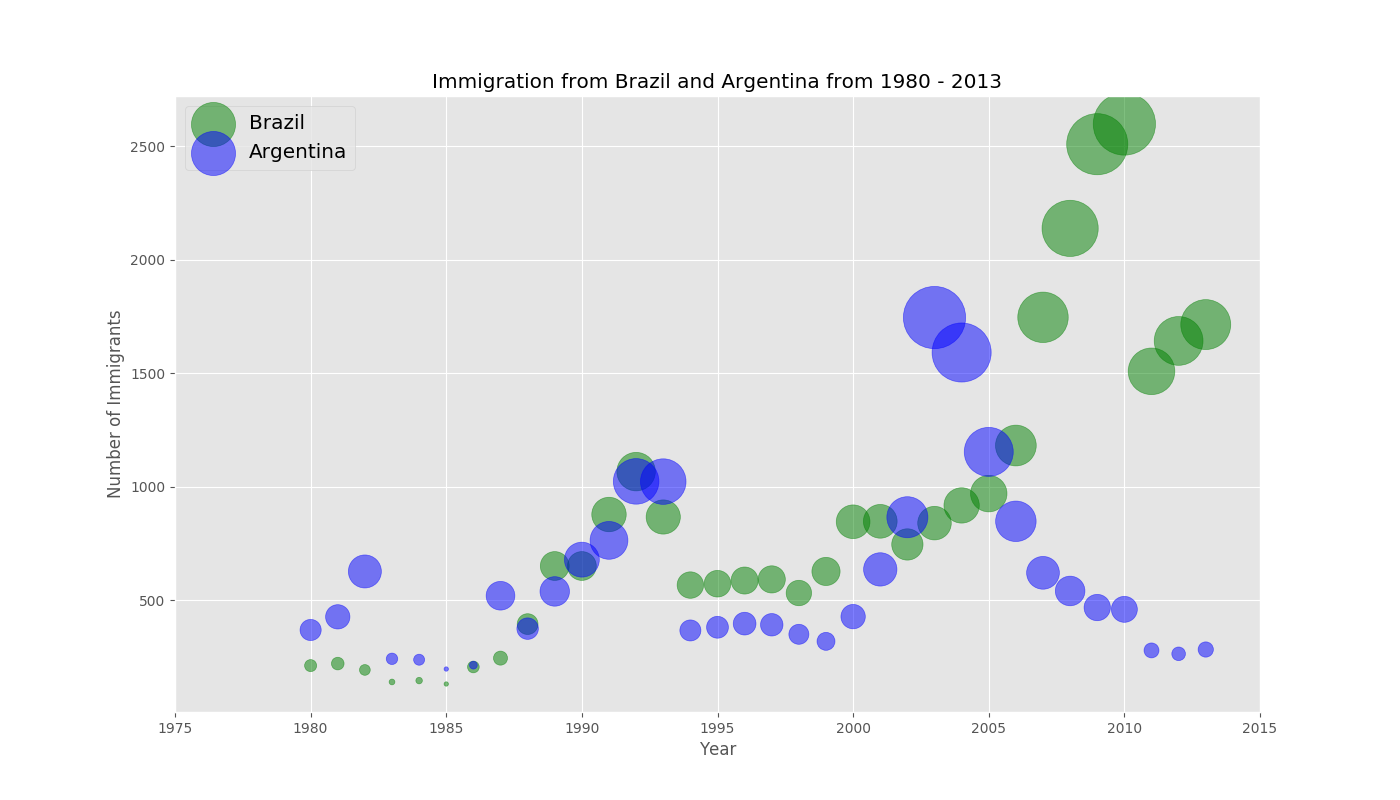

In [46]:
# Brazil
ax0 = df_T.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_T.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')